# Kernel SVM

## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [48]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [50]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [51]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [52]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [53]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
print(X_train)

[[ 0.582 -0.887]
 [-0.607  1.462]
 [-0.013 -0.568]
 [-0.607  1.897]
 [ 1.374 -1.409]
 [ 1.473  0.998]
 [ 0.086 -0.8  ]
 [-0.013 -0.249]
 [-0.211 -0.568]
 [-0.211 -0.191]
 [-0.31  -1.293]
 [-0.31  -0.568]
 [ 0.384  0.099]
 [ 0.879 -0.597]
 [ 2.067 -1.177]
 [ 1.077 -0.133]
 [ 0.681  1.781]
 [-0.706  0.563]
 [ 0.78   0.36 ]
 [ 0.879 -0.539]
 [-1.201 -1.583]
 [ 2.166  0.94 ]
 [-0.013  1.23 ]
 [ 0.186  1.085]
 [ 0.384 -0.481]
 [-0.31  -0.307]
 [ 0.978 -0.829]
 [ 0.978  1.868]
 [-0.013  1.259]
 [-0.904  2.274]
 [-1.201 -1.583]
 [ 2.166 -0.8  ]
 [-1.399 -1.467]
 [ 0.384  2.303]
 [ 0.78   0.766]
 [-1.003 -0.307]
 [ 0.086  0.766]
 [-1.003  0.563]
 [ 0.285  0.07 ]
 [ 0.681 -1.264]
 [-0.508 -0.017]
 [-1.795  0.36 ]
 [-0.706  0.128]
 [ 0.384  0.302]
 [-0.31   0.07 ]
 [-0.508  2.303]
 [ 0.186  0.041]
 [ 1.275  2.216]
 [ 0.78   0.273]
 [-0.31   0.157]
 [-0.013 -0.539]
 [-0.211  0.157]
 [-0.112  0.244]
 [-0.013 -0.249]
 [ 2.166  1.114]
 [-1.795  0.36 ]
 [ 1.869  0.128]
 [ 0.384 -0.133]
 [-1.201  0.30

In [56]:
print(X_test)

[[-0.805  0.505]
 [-0.013 -0.568]
 [-0.31   0.157]
 [-0.805  0.273]
 [-0.31  -0.568]
 [-1.102 -1.438]
 [-0.706 -1.583]
 [-0.211  2.158]
 [-1.993 -0.046]
 [ 0.879 -0.771]
 [-0.805 -0.597]
 [-1.003 -0.423]
 [-0.112 -0.423]
 [ 0.086  0.215]
 [-1.795  0.476]
 [-0.607  1.375]
 [-0.112  0.215]
 [-1.894  0.447]
 [ 1.671  1.752]
 [-0.31  -1.38 ]
 [-0.31  -0.655]
 [ 0.879  2.158]
 [ 0.285 -0.539]
 [ 0.879  1.027]
 [-1.498 -1.206]
 [ 1.077  2.071]
 [-1.003  0.505]
 [-0.904  0.302]
 [-0.112 -0.22 ]
 [-0.607  0.476]
 [-1.696  0.534]
 [-0.112  0.273]
 [ 1.869 -0.278]
 [-0.112 -0.481]
 [-1.399 -0.336]
 [-1.993 -0.51 ]
 [-1.597  0.331]
 [-0.409 -0.771]
 [-0.706 -1.032]
 [ 1.077 -0.974]
 [-1.102  0.534]
 [ 0.285 -0.51 ]
 [-1.102  0.418]
 [-0.31  -1.438]
 [ 0.483  1.23 ]
 [-1.102 -0.336]
 [-0.112  0.302]
 [ 1.374  0.592]
 [-1.201 -1.148]
 [ 1.077  0.476]
 [ 1.869  1.52 ]
 [-0.409 -1.293]
 [-0.31  -0.365]
 [-0.409  1.317]
 [ 2.067  0.534]
 [ 0.681 -1.09 ]
 [-0.904  0.389]
 [-1.201  0.302]
 [ 1.077 -1.20

## Training the Kernel SVM model on the Training set

In [57]:
from sklearn.svm import SVC
# SVM Support Vector Machine
# SVC C-Support Vector Classification
classifier = SVC(kernel='rbf', random_state=0, probability=True)
# RBF = Radial Basis Function kernel
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting a new result

In [58]:
new_data = [[30, 87000]]
new_data = scaler.transform(new_data)
new_pred_prob = classifier.predict_proba(new_data)
new_pred_bool = classifier.predict(new_data)

In [59]:
print(new_pred_prob) # 92% for 0 (no) and 8% for 1 (yes)

[[0.921 0.079]]


In [60]:
print(new_pred_bool)

[0]


## Predicting the Test set and comparing results

In [61]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)
np.set_printoptions(precision=3)
y_pred_res = y_pred.reshape(len(y_pred), 1)
y_prob_res = y_prob.reshape(len(y_test), 2)
y_test_res = y_test.reshape(len(y_test), 1)
y_pred_vs_y_test = np.concatenate((y_pred_res, y_test_res, y_prob_res), 1)
print(y_pred_vs_y_test)

[[0.    0.    0.921 0.079]
 [0.    0.    0.979 0.021]
 [0.    0.    0.971 0.029]
 [0.    0.    0.97  0.03 ]
 [0.    0.    0.99  0.01 ]
 [0.    0.    0.955 0.045]
 [0.    0.    0.924 0.076]
 [1.    1.    0.083 0.917]
 [0.    0.    0.944 0.056]
 [1.    0.    0.302 0.698]
 [0.    0.    0.992 0.008]
 [0.    0.    0.992 0.008]
 [0.    0.    0.987 0.013]
 [0.    0.    0.921 0.079]
 [0.    0.    0.934 0.066]
 [1.    0.    0.137 0.863]
 [0.    0.    0.947 0.053]
 [0.    0.    0.93  0.07 ]
 [1.    1.    0.125 0.875]
 [0.    0.    0.909 0.091]
 [0.    0.    0.989 0.011]
 [1.    1.    0.146 0.854]
 [0.    0.    0.938 0.062]
 [1.    1.    0.111 0.889]
 [0.    0.    0.961 0.039]
 [1.    1.    0.141 0.859]
 [0.    0.    0.934 0.066]
 [0.    0.    0.968 0.032]
 [0.    0.    0.986 0.014]
 [0.    0.    0.913 0.087]
 [0.    0.    0.933 0.067]
 [0.    1.    0.934 0.066]
 [1.    1.    0.108 0.892]
 [0.    0.    0.986 0.014]
 [0.    0.    0.985 0.015]
 [0.    0.    0.945 0.055]
 [0.    0.    0.958 0.042]
 

## Making the Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [63]:
print(confusion)
# 0 no false: 64/67 correct predictions (3 wrong)
# 1 yes true: 29/33 correct predictions (4 wrong)

[[64  4]
 [ 3 29]]


In [64]:
print(accuracy)
# 93% total of correct predictions (7% wrong)

0.93


## Visualising the Training set results

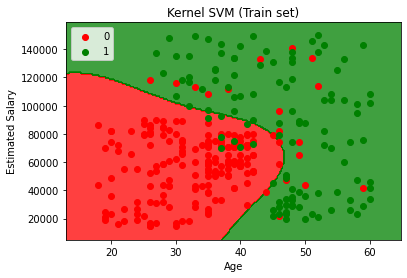

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:, 0].max() + 5, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 10000, stop = X_set[:, 1].max() + 10000, step = 1000))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

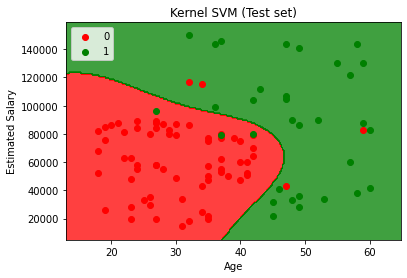

In [66]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:, 0].max() + 5, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 10000, stop = X_set[:, 1].max() + 10000, step = 1000))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()